# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 601


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units=imperial"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all'] #Percent cloudiness
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt'] #time of data calculation, unix, UTC

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    time.sleep(0.5)
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
City not found. Skipping...
Processing Record 2 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 3 of Set 1 | tasiilaq
City not found. Skipping...
Processing Record 4 of Set 1 | portland
City not found. Skipping...
Processing Record 5 of Set 1 | vostok
City not found. Skipping...
Processing Record 6 of Set 1 | barrow
City not found. Skipping...
Processing Record 7 of Set 1 | igarapava
City not found. Skipping...
Processing Record 8 of Set 1 | airai
City not found. Skipping...
Processing Record 9 of Set 1 | kashi
City not found. Skipping...
Processing Record 10 of Set 1 | port alfred
City not found. Skipping...
Processing Record 11 of Set 1 | makinsk
City not found. Skipping...
Processing Record 12 of Set 1 | chuy
City not found. Skipping...
Processing Record 13 of Set 1 | rikitea
City not found. Skipping...
Processing Record 14 of Set 1 | mahebourg
City not found. Skippi

Processing Record 19 of Set 3 | georgetown
Processing Record 20 of Set 3 | severo-kurilsk
Processing Record 21 of Set 3 | barbar
City not found. Skipping...
Processing Record 22 of Set 3 | norman wells
Processing Record 23 of Set 3 | cape town
Processing Record 24 of Set 3 | vestmanna
Processing Record 25 of Set 3 | ambon
Processing Record 26 of Set 3 | alice springs
Processing Record 27 of Set 3 | cabo san lucas
Processing Record 28 of Set 3 | saleaula
City not found. Skipping...
Processing Record 29 of Set 3 | lodja
Processing Record 30 of Set 3 | saint-joseph
Processing Record 31 of Set 3 | port lincoln
Processing Record 32 of Set 3 | vila franca do campo
Processing Record 33 of Set 3 | namwala
Processing Record 34 of Set 3 | kansanshi
Processing Record 35 of Set 3 | harlingen
Processing Record 36 of Set 3 | bereda
Processing Record 37 of Set 3 | trairi
Processing Record 38 of Set 3 | ancud
Processing Record 39 of Set 3 | podor
Processing Record 40 of Set 3 | shafranovo
Processing R

Processing Record 8 of Set 7 | samalaeulu
City not found. Skipping...
Processing Record 9 of Set 7 | westport
Processing Record 10 of Set 7 | twin falls
Processing Record 11 of Set 7 | lasa
Processing Record 12 of Set 7 | dingle
Processing Record 13 of Set 7 | fukue
Processing Record 14 of Set 7 | husavik
Processing Record 15 of Set 7 | presov
Processing Record 16 of Set 7 | el alto
Processing Record 17 of Set 7 | carnarvon
Processing Record 18 of Set 7 | vuktyl
Processing Record 19 of Set 7 | maningrida
Processing Record 20 of Set 7 | krasnoselkup
Processing Record 21 of Set 7 | zolotukhino
Processing Record 22 of Set 7 | pisco
Processing Record 23 of Set 7 | alofi
Processing Record 24 of Set 7 | broken hill
Processing Record 25 of Set 7 | tumannyy
City not found. Skipping...
Processing Record 26 of Set 7 | kamenskoye
City not found. Skipping...
Processing Record 27 of Set 7 | rawson
Processing Record 28 of Set 7 | bandarbeyla
Processing Record 29 of Set 7 | college
Processing Record 

Processing Record 44 of Set 10 | paita
Processing Record 45 of Set 10 | tarsus
Processing Record 46 of Set 10 | halalo
City not found. Skipping...
Processing Record 47 of Set 10 | shingu
Processing Record 48 of Set 10 | maniitsoq
Processing Record 49 of Set 10 | shimoda
Processing Record 0 of Set 11 | porterville
Processing Record 1 of Set 11 | zhanaozen
Processing Record 2 of Set 11 | pringsewu
Processing Record 3 of Set 11 | umaria
Processing Record 4 of Set 11 | kaniama
Processing Record 5 of Set 11 | brajrajnagar
City not found. Skipping...
Processing Record 6 of Set 11 | morehead
Processing Record 7 of Set 11 | faro
Processing Record 8 of Set 11 | aksarayskiy
Processing Record 9 of Set 11 | george town
Processing Record 10 of Set 11 | sao jose da coroa grande
Processing Record 11 of Set 11 | kloulklubed
Processing Record 12 of Set 11 | tukrah
Processing Record 13 of Set 11 | flinders
Processing Record 14 of Set 11 | geresk
City not found. Skipping...
Processing Record 15 of Set 11

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data) #city_data already is 
                                    #a list of dictionaries!

# Show Record Count
city_data_df.count()

City          445
Lat           445
Lng           445
Max Temp      445
Humidity      445
Cloudiness    445
Wind Speed    445
Country       445
Date          445
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kandrian,-6.2167,149.5500,81.37,79,99,6.04,PG,1677886981
1,ribeira grande,38.5167,-28.7000,54.77,85,95,3.00,PT,1677886427
2,sao raimundo das mangabeiras,-7.0219,-45.4811,76.78,80,26,3.80,BR,1677886983
3,kaitangata,-46.2817,169.8464,59.76,47,92,6.55,NZ,1677886984
4,wilmington,34.2257,-77.9447,75.11,64,0,23.02,US,1677886954


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kandrian,-6.2167,149.5500,81.37,79,99,6.04,PG,1677886981
1,ribeira grande,38.5167,-28.7000,54.77,85,95,3.00,PT,1677886427
2,sao raimundo das mangabeiras,-7.0219,-45.4811,76.78,80,26,3.80,BR,1677886983
3,kaitangata,-46.2817,169.8464,59.76,47,92,6.55,NZ,1677886984
4,wilmington,34.2257,-77.9447,75.11,64,0,23.02,US,1677886954


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

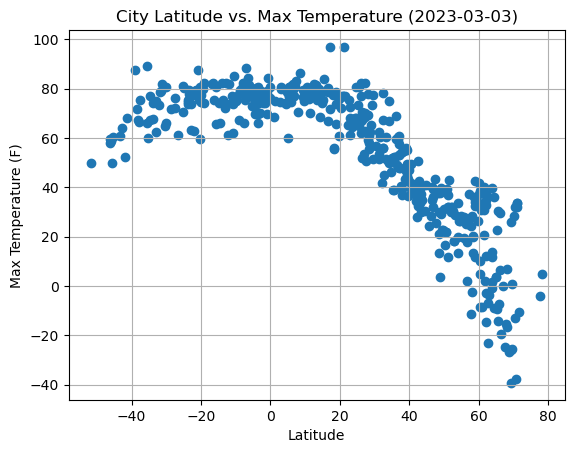

In [18]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature (2023-03-03)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

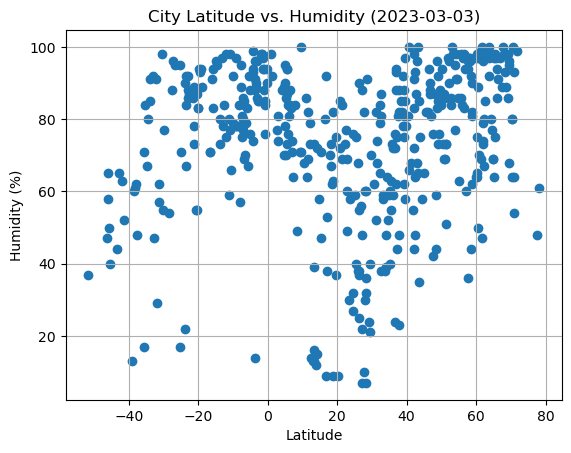

In [19]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2023-03-03)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

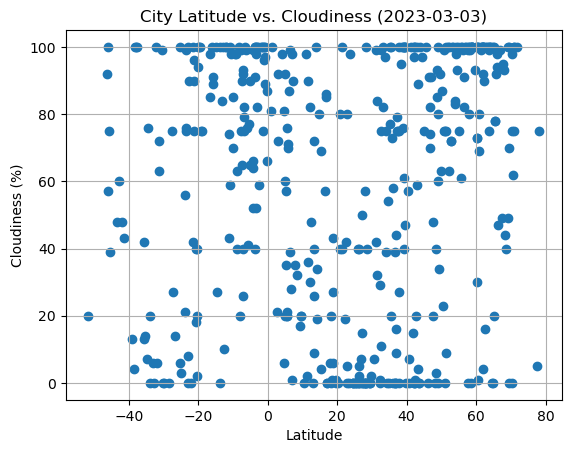

In [20]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2023-03-03)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

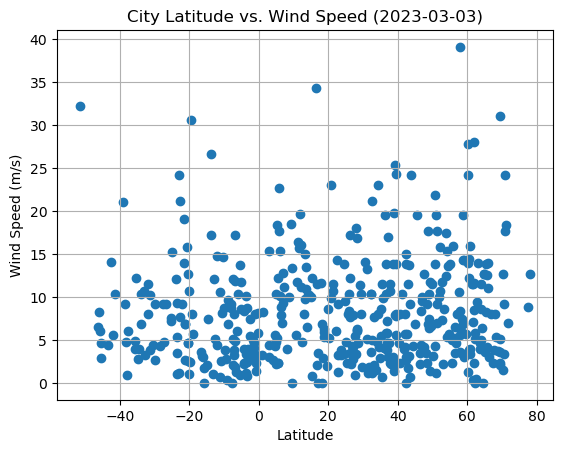

In [21]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2023-03-03)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [43]:
# Define a function to create Linear Regression plots
def LinReg(slope,intercept,r, x_data):
    print(f"The r-value is: {r}")
    xs = range(int(min(x_data)),int(max(x_data)))
    ys = slope*xs + intercept
    plt.plot(xs,ys,'r-')

In [27]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ribeira grande,38.5167,-28.7000,54.77,85,95,3.00,PT,1677886427
4,wilmington,34.2257,-77.9447,75.11,64,0,23.02,US,1677886954
5,georgetown,5.4112,100.3354,76.93,94,20,2.30,MY,1677886920
6,severo-kurilsk,50.6789,156.1250,21.79,69,99,21.88,RU,1677886987
7,norman wells,65.2820,-126.8329,-9.36,64,20,13.80,CA,1677886989


In [25]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df.loc[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kandrian,-6.2167,149.5500,81.37,79,99,6.04,PG,1677886981
2,sao raimundo das mangabeiras,-7.0219,-45.4811,76.78,80,26,3.80,BR,1677886983
3,kaitangata,-46.2817,169.8464,59.76,47,92,6.55,NZ,1677886984
8,cape town,-33.9258,18.4232,67.91,85,20,10.36,ZA,1677886779
10,ambon,-3.6954,128.1814,80.74,14,40,1.14,ID,1677886992


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.887150373715978


Text(0, 0, 'y = -1.28x + 94.17')

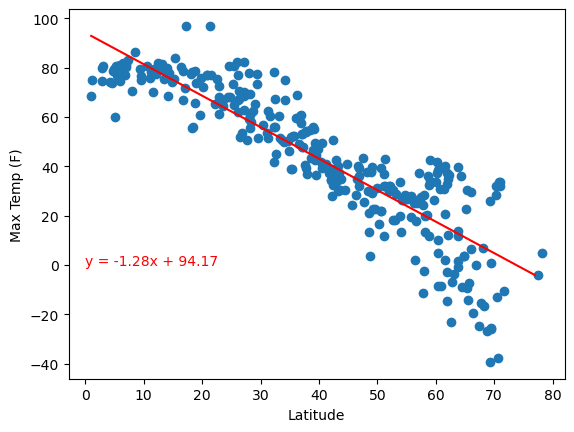

In [44]:
# Linear regression on Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])

#put into Linear Regression function used earlier
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
LinReg(slope,intercept,rvalue, northern_hemi_df["Lat"])
plt.annotate(f"y = {slope:.2f}x + {intercept:.2f}",xy=(0,0),color='red')

The r-value is: 0.47626050007150533


Text(-15, 55, 'y = 0.27x + 79.16')

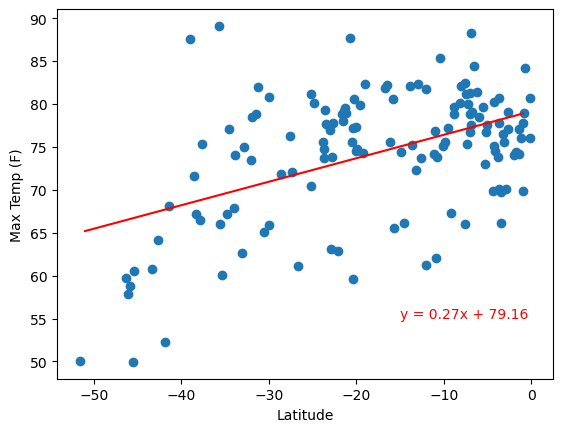

In [47]:
# Linear regression on Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])

#put into Linear Regression function used earlier
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
LinReg(slope,intercept,rvalue, southern_hemi_df["Lat"])
plt.annotate(f"y = {slope:.2f}x + {intercept:.2f}",xy=(-15,55),color='red')

**Discussion about the linear relationship:** There seems to be a strong negative correlation between latitude and max temp for the northern hemisphere, which is consistent with what we would expect based on our knowledge of the equator. However, there isn't a strong positive correlation between Latitude and Max Temp in the Southern hemisphere. This may be a result of more data being available for the northern hemisphere than the southern hemisphere.

In [53]:
print(f"The northern hemisphere has {northern_hemi_df['Max Temp'].size} in city_data_df.")
print(f"The southern hemisphere has {southern_hemi_df['Max Temp'].size} in city_data_df.")

The northern hemisphere has 310 in city_data_df.
The southern hemisphere has 135 in city_data_df.


### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.3345697394273124


Text(60, 20, 'y = 0.38x + 57.03')

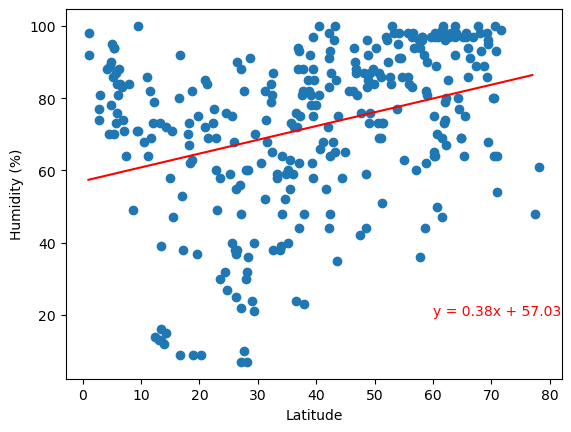

In [56]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])

#put into Linear Regression function used earlier
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
LinReg(slope,intercept,rvalue, northern_hemi_df["Lat"])
plt.annotate(f"y = {slope:.2f}x + {intercept:.2f}",xy=(60,20),color='red')

The r-value is: 0.5050940747384071


Text(-15, 40, 'y = 0.73x + 90.40')

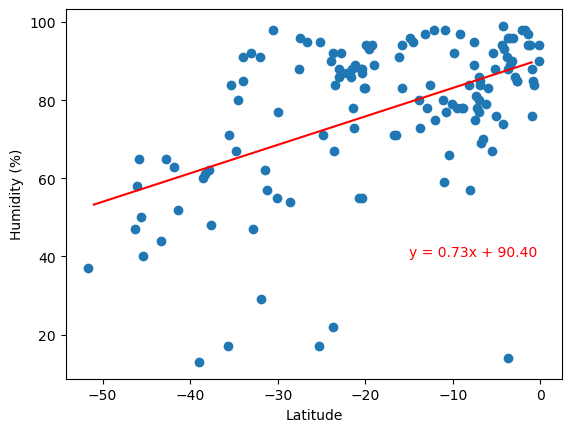

In [58]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])

#put into Linear Regression function used earlier
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
LinReg(slope,intercept,rvalue, southern_hemi_df["Lat"])
plt.annotate(f"y = {slope:.2f}x + {intercept:.2f}",xy=(-15,40),color='red')

**Discussion about the linear relationship:** There doesn't seem to be a strong correlation for the northern or southern hemisphere between humidity and latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.35402909566205965


Text(60, 20, 'y = 0.71x + 27.39')

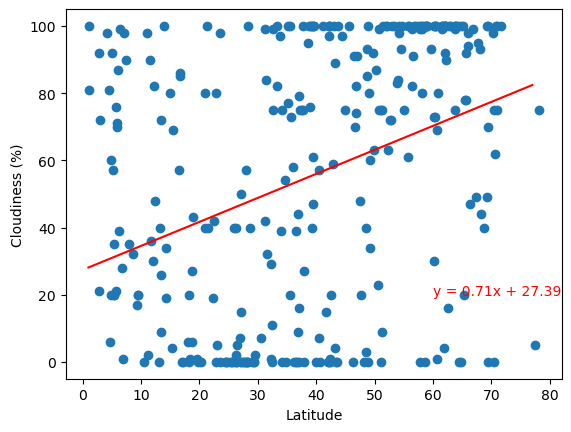

In [61]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])

#put into Linear Regression function used earlier
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
LinReg(slope,intercept,rvalue, northern_hemi_df["Lat"])
plt.annotate(f"y = {slope:.2f}x + {intercept:.2f}",xy=(60,20),color='red')

The r-value is: 0.3931630104172916


Text(-50, 80, 'y = 1.03x + 84.03')

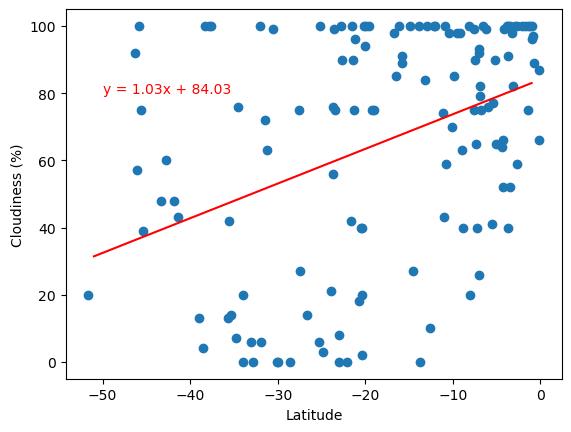

In [62]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])

#put into Linear Regression function used earlier
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
LinReg(slope,intercept,rvalue, southern_hemi_df["Lat"])
plt.annotate(f"y = {slope:.2f}x + {intercept:.2f}",xy=(-50,80),color='red')

**Discussion about the linear relationship:** There doesn't seem to be a strong correlation for the northern or southern hemisphere between cloudiness and latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.03000466669862365


Text(60, 20, 'y = 0.01x + 8.30')

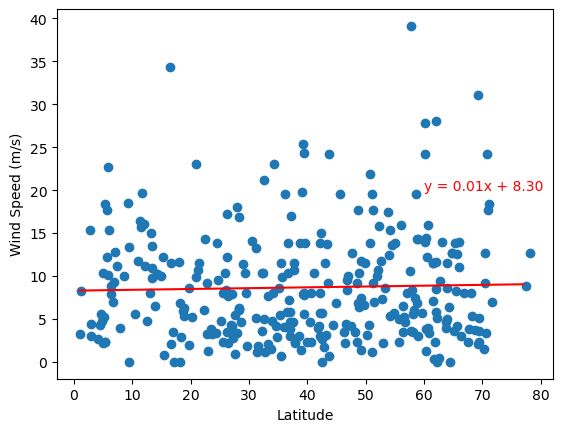

In [63]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])

#put into Linear Regression function used earlier
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
LinReg(slope,intercept,rvalue, northern_hemi_df["Lat"])
plt.annotate(f"y = {slope:.2f}x + {intercept:.2f}",xy=(60,20),color='red')

The r-value is: -0.20821121559485162


Text(-40, 20, 'y = -0.09x + 5.55')

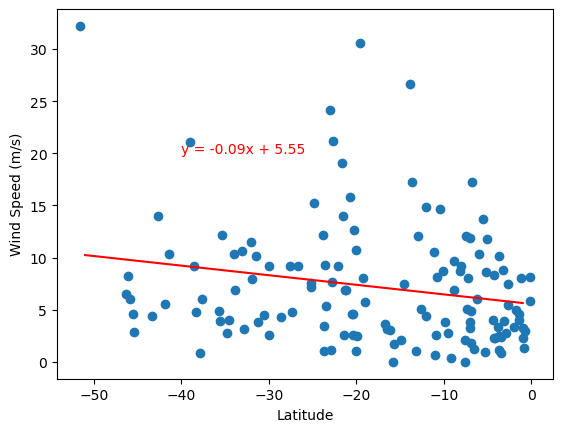

In [66]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])

#put into Linear Regression function used earlier
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
LinReg(slope,intercept,rvalue, southern_hemi_df["Lat"])
plt.annotate(f"y = {slope:.2f}x + {intercept:.2f}",xy=(-40,20),color='red')

**Discussion about the linear relationship:** Based on the low R-values, there doesn't seem to be a strong correlation for the northern or southern hemisphere between wind speed and latitude.